In [1]:
from functions import *
from random import sample
from htmldate import find_date
from concurrent.futures import ThreadPoolExecutor
from bs4 import BeautifulSoup
import json
from langid.langid import LanguageIdentifier, model
from collections import Counter
import matplotlib.pyplot as plt
import matplotlib
from tqdm import tqdm
import operator
import seaborn as sns
import matplotlib.pyplot as plt
from adjustText import adjust_text
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import random
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns
import matplotlib.pyplot as plt
import dateparser
import random
import re
from pylab import *

/home/ruben/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [141]:
model = KeyedVectors.load_word2vec_format('GoogleNews-vectors-negative300-SLIM.bin',binary=True)
model.init_sims(replace=True)

In [142]:
with open('sentences-titles-en.txt','r') as f:
    sentences = f.readlines()

vocab = list(model.wv.vocab)

sentences = [s.replace('\n','') for s in sentences]
sentences = list(set(sentences))
sentences = [s.split(' ') for s in sentences]
sentences = [s for s in sentences if len(s) > 4]
print('number of sentences: {}'.format(len(sentences)))

number of sentences: 831


/home/ruben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  after removing the cwd from sys.path.


In [143]:
def document_vector(word2vec_model, doc):
    doc = [word for word in doc if word in model.wv.vocab]
    if doc is None or len(doc) == 0:
        return 
    else:
        return np.mean(model[doc], axis=0)

vectors = []
titles = []

for s in tqdm(sentences): # append the vector for each document
    docvector = document_vector(model,s)
    if docvector is not None:
        vectors.append(docvector)
        titles.append(" ".join(s))
    
vectors = np.array(vectors) # list to array

  0%|          | 0/831 [00:00<?, ?it/s]/home/ruben/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Call to deprecated `wv` (Attribute will be removed in 4.0.0, use self instead).
  
100%|██████████| 831/831 [00:00<00:00, 7973.63it/s]


In [144]:
# Initialize t-SNE
tsne = TSNE(n_components = 2, init = 'random', random_state = 10, perplexity = 100)
tsne_df = tsne.fit_transform(vectors)

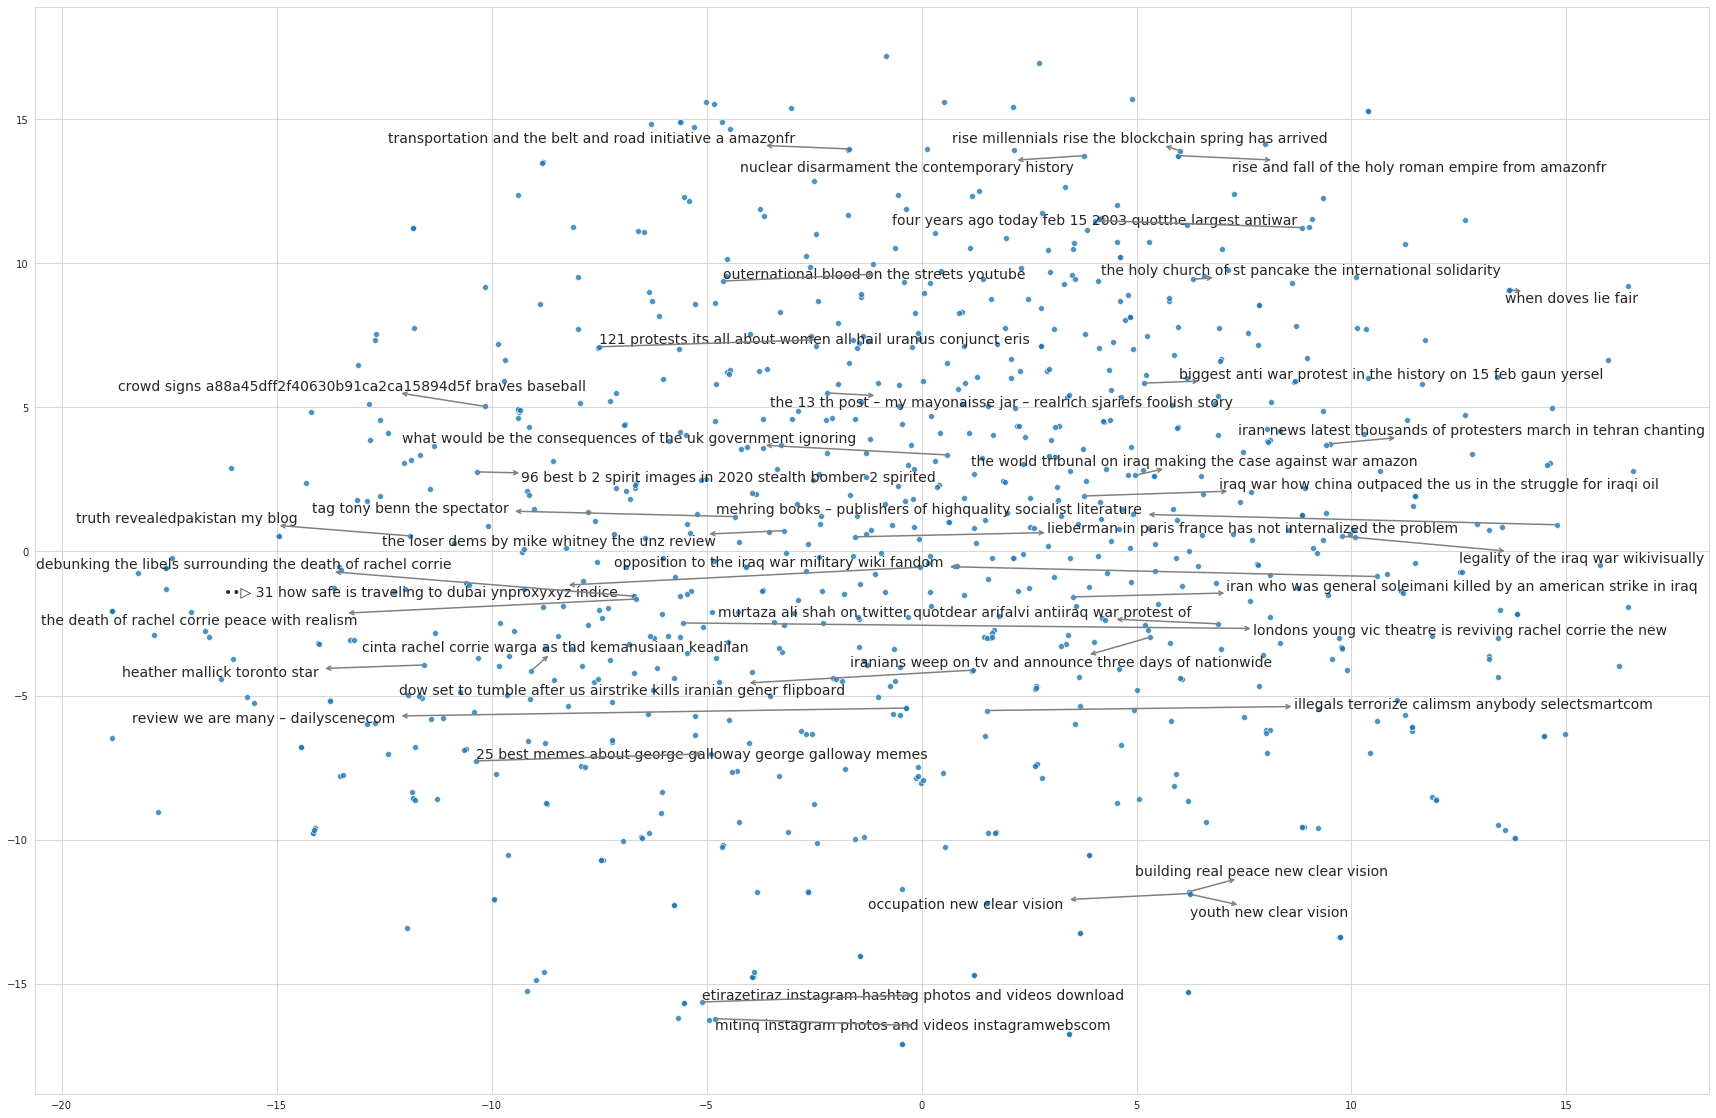

In [145]:
fig, ax = plt.subplots(figsize = (30, 20))
sns.scatterplot(tsne_df[:, 0], tsne_df[:, 1], alpha = 0.8)

titles_list = titles
texts = []
titles_to_plot = list(np.arange(0, len(titles), 20))

# Append words to list
for title in titles_to_plot:
    texts.append(plt.text(tsne_df[title, 0], tsne_df[title, 1], titles_list[title], fontsize = 14))
    
# Plot text using adjust_text
adjust_text(texts, force_points = 0.4, force_text = 0.4, 
            expand_points = (2,1), expand_text = (1,2),
            arrowprops = dict(arrowstyle = "<-", color = 'grey', lw = 1.5))

plt.show()

In [146]:
df = pd.DataFrame(vectors)
df.index=titles

In [147]:
kmeans_model = KMeans(n_clusters=10, init='k-means++', max_iter=100) 
X = kmeans_model.fit(df)
labels=kmeans_model.labels_.tolist()

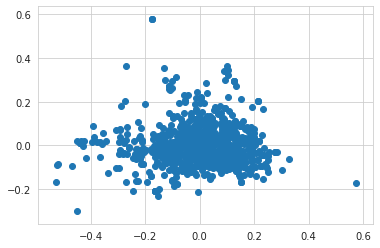

In [148]:
l = kmeans_model.fit_predict(df)
pca = PCA(n_components=2).fit(df)
datapoint = pca.transform(df)

plt.figure
#label1 = ['#FFFF00', '#008000', '#0000FF', '#800080']
#color = [label1[i] for i in labels]
plt.scatter(datapoint[:, 0], datapoint[:, 1]) #, c=color

In [149]:
listl = list(zip(list(df.index),labels))

In [150]:
[l for l in listl if l[1] == 6]

[('my name is rachel x the jewish press jewishpresscom ', 6),
 ('retard zone » israeli army to field tiny bulldozers ', 6),
 ('dr abdul wahed jalal nori new straits times malaysia general ', 6),
 ('peter turchin is war creative peter turchin ', 6),
 ('rachel corries family loses wrongful death appeal in israels ', 6),
 ('gaza rachel corrie pancake breakfast the jawa report ', 6),
 ('hack hacking hacker virus anarchy dark computer internet ', 6),
 ('foto stock esclusive a tema we run rome marathon shutterstock ', 6),
 ('the upcoming rachel corrie trial go after her real killers ', 6),
 ('rachel corries parents seek a 16th minute of infamy wizbang ', 6),
 ('dow jones industrial average set to tumble after us airstrike kills ', 6),
 ('knsj radio on twitter quotcandlelight vigil for victims of istanbul ', 6),
 ('24 best bea images in 2020 african hats royal video dutch queen ', 6),
 ('a humble tribute to actress sukumari amulyam ', 6),
 ('stunning riveting horrifying joshua oppenheimers th

In [128]:
len(labels)

8624

In [129]:
df.index

Index(['february 15 2003 the day the world said no to war institute for ',
       'poignant photos of 2003s antiwar protest the biggest march ',
       'were the anti iraq war demonstrations of 2003 too good to be true ',
       'is coup against corbyn a plot to spare blair from war crimes probe ',
       '45 best london stop the war march 15 february 2003 images ',
       'iraq war antiwar protest london sept2002 400k took part there ',
       'biggest anti war protest in the history on 15 feb gaun yersel ',
       'stop the war coalition military wiki fandom military wikia ',
       'remembering the iraq war key facts and figures forces network ',
       'iraq war a proposal to help save our precious right to civil trials by ',
       ...
       'saddam hussein saddams death holism in the middle east ',
       'where were you on february 15 2003 by mike ferner ',
       'sunday protest blogging february 15 capitalism bad tree pretty ',
       '24 best new york stop the war march 15 f